# <center>MoviePy生成动画</center>

By [青衣极客 Blue Geek](https://mp.weixin.qq.com/s/n8Upju4TUFYo-069XdZA9A)

In 2019-09-22

突发奇想地想用python制作动画，matplotlib虽然也可以做，但是对一些复杂一点的需求可能就不能处理了。在网上找了一下，发现有一款第三方库MoviePy，不仅能完成生成动画的任务，还可以进行视频剪辑，不得不感叹：python果然是无所不能。这里演示一下最简单的基本功能，让大家了解一下这个工具，更多的功能等待大家去探索。闲言少叙，先来一睹为快。

In [1]:
import os
import sys
# 导入matplotlib用于绘图
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
# 导入moviepy，用于制作动画
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

## 1. 生成2D曲线动画

这里想要生成一个二维的直线到曲线的变化动画。使用matplotlib来进行图像帧的绘制，MoviePy会根据图像帧来进行动画的生成，生成完成之后再将动画写入到一个gif文件中。

<IPython.core.display.Javascript object>


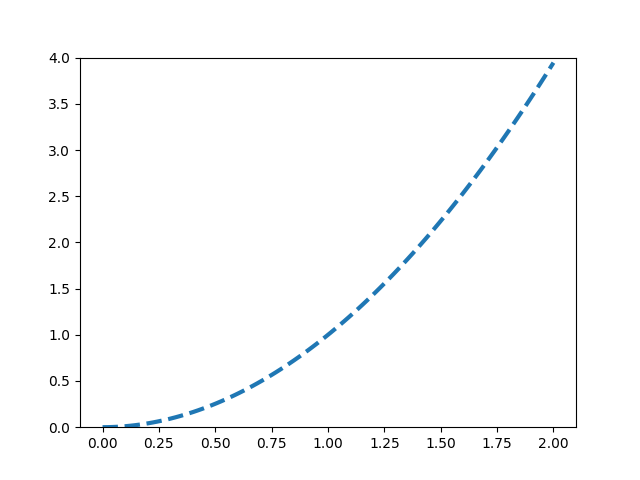

t:   6%|▌         | 3/50 [00:00<00:01, 23.98it/s, now=None]

MoviePy - Building file ../../output/curve.gif with imageio.


In [48]:
fig= plt.figure()
X = np.linspace(0, 2, 100)
Y = X
[line] = plt.plot(X, Y, linestyle='--', lw=3)
plt.ylim([0, 4])
T = 5  # 动画持续时间长度

# 用于绘制图像帧的函数
def make_frame(t):
    Y = (X) ** ( 1 + t / T)  # 计算随时间变化的幂指数
    line.set_data(X, Y)      # 设置新的坐标值
    return mplfig_to_npimage(fig)  # 返回当前图像
# 创建动画对象
animation = mpy.VideoClip(make_frame, duration=T)
# 在notebook中显示动画
#animation.ipython_display(fps=30, transparent=True)
# 保存动画到gif文件
animation.write_gif('../../output/curve.gif', fps=10)

动画描述的是一条 $y=x$ 的直线逐渐变成 $y=x^2$ 的曲线的过程。

## 2. 生成3D曲面动画

用同样的方式也可以生成三维高斯曲面变化动画。如果有朋友不清楚怎样使用matplotlib绘制三维曲面，可以参考我的另一个帖子“matplotlib的8个常用操作”。这里绘制的是二维相互独立的高斯曲面，也就是协方差为0.通过改变两个坐标轴上的标准差来表现曲面的变化。

<IPython.core.display.Javascript object>


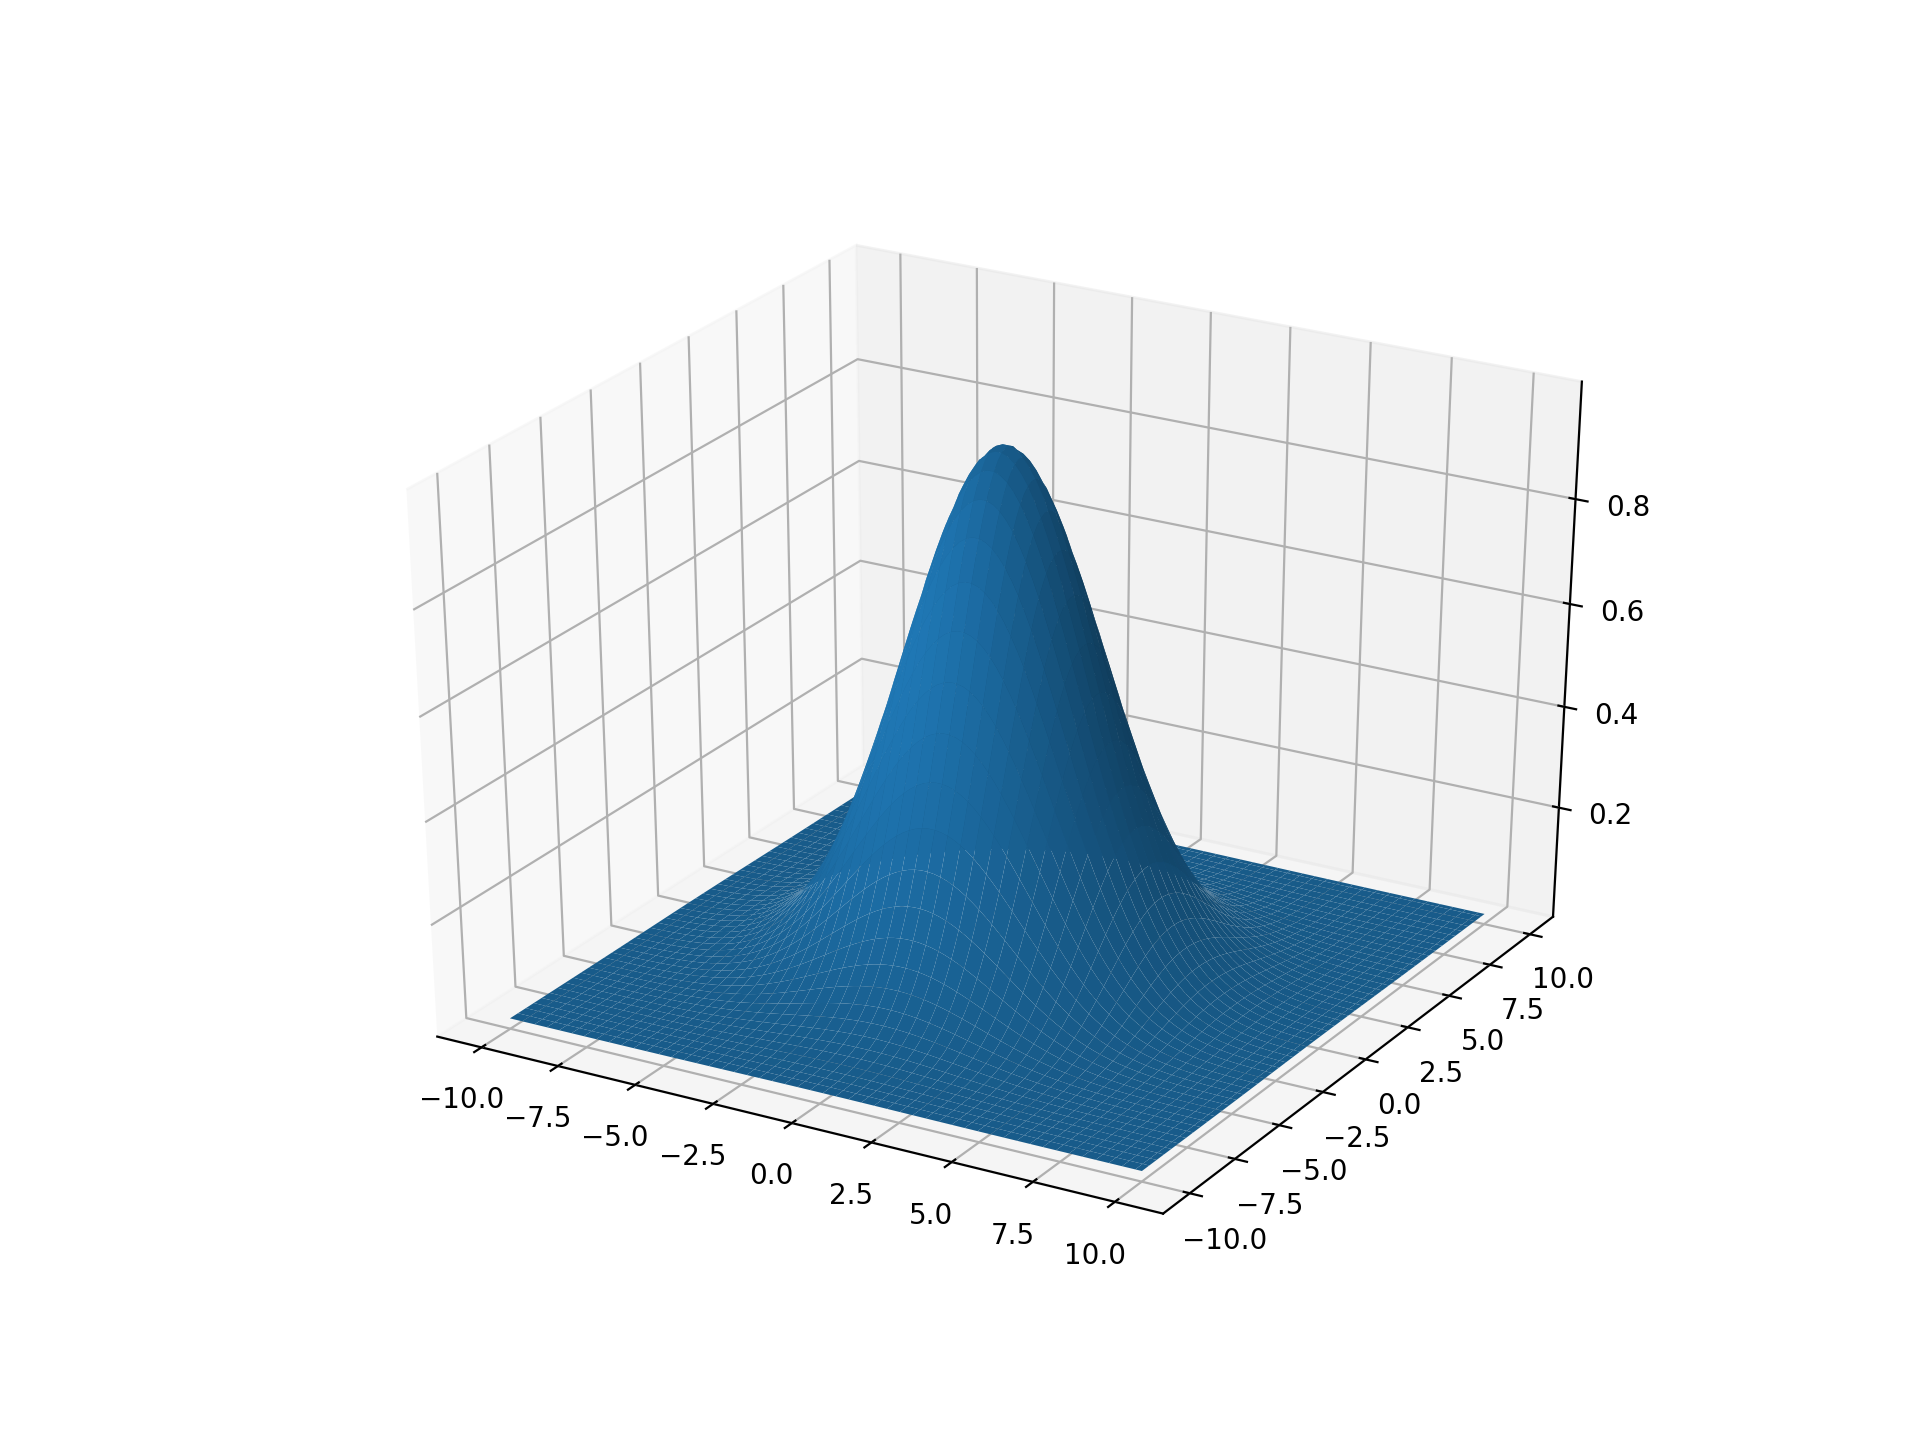

t:   0%|          | 0/25 [00:00<?, ?it/s, now=None]

MoviePy - Building file ../output/3d.gif with imageio.


In [6]:
# 导入3D画图组建
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9.6, 7.2))
ax = fig.gca(projection='3d')
X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
XX, YY = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + YY**2))
# 绘制3D曲面
ax.plot_surface(XX, YY, Z)
T = 5  # 设置动画持续时间长度为5秒
# 用于绘制图像帧
def make_frame(t):
    Z = np.exp(-(X**2 + YY**2)/(1+t*3))
    plt.cla()
    ax.plot_surface(XX, YY, Z)
    return mplfig_to_npimage(fig)
# 创建动画对象
animation = mpy.VideoClip(make_frame, duration=T)
# 在notebook中显示动画
#animation.ipython_display(fps=10)
# 保存动画到gif文件
animation.write_gif('../output/3d.gif', fps=5)
    
    

可以看见这种生成动画的方式是极其简单的，可以轻松上手。如果还想要更加深入一些，或者说想制作更复杂一些的动画，可以使用vispy配合MoviePy来进行绘画。